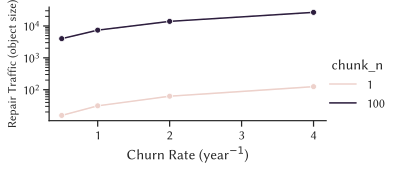

In [1]:
%config InlineBackend.figure_formats = ['svg']
import pandas as pd
import seaborn as sns
from glob import glob
sns.set_theme(style="ticks", font="Linux Biolinum O", font_scale=1.2)

frames = [pd.read_csv(data) for data in glob('../churn-repair-*.csv')]
data = pd.concat(frames, ignore_index=True)
sns.relplot(data=data, 
    kind="line",
    x="churn_rate", y="repair", hue="chunk_n",
    marker="o",
    height=2.56, aspect=2.) \
.set_xlabels("Churn Rate (year$^{-1}$)") \
.set_ylabels("Repair Traffic (object size)", fontdict={"size": "small"}) \
.set(yscale="log")